<a href="https://colab.research.google.com/github/Ritik2-ux/EDA-in-Python-ML-./blob/master/MLPROJECT_CAR_FEATURES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exploratory data analysis in Python**

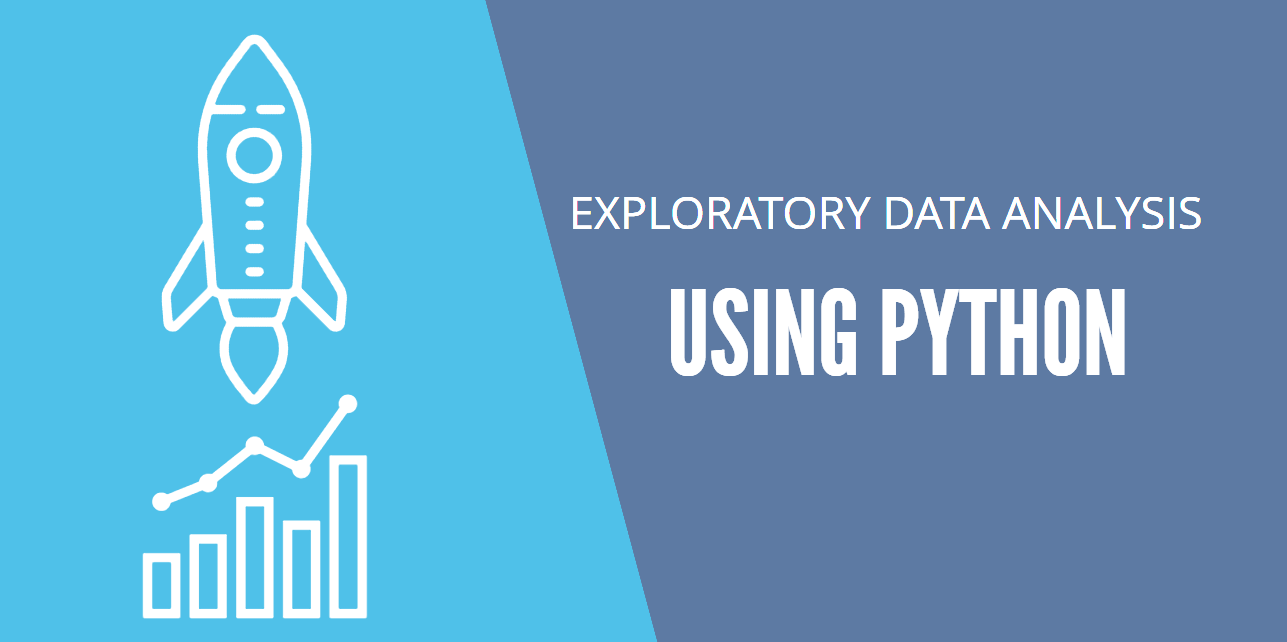

# **Importing the dataset and the necessary libraries, checking data type, statistical summary, shape, null values, etc**



**Importing libraries to use the library functions**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             

%matplotlib inline     
import plotly.graph_objects as go
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


 **UPLOAD DATA**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


**READ DATA**

In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [4]:
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [5]:
# To display the top 5 rows 
df.head(5)     

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [6]:
# To display the botton 5 rows
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [7]:
#listing the column names of the dataset/dataframe
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [8]:
#checking the datatypes of different columns of the dataframe
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [9]:
#getting the information of dataframe such as no. of entries,data columns,non-null count,data types,etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [10]:
#shape of the dataframe ie no. of rows and columns
df.shape

(11914, 16)

In [11]:
#checking for statistical summary such as count,mean,etc. of numeric columns
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [12]:
#dropping rows which have zero as a value for MSRP column as it is our dependent/target variable.
df.drop(df[df['MSRP'] == 0].index,inplace=True)

In [13]:
df.shape

(11914, 16)

# **Dropping less relevance columns.**



In [14]:
#dropping 'market category' column as MSRP is independent of it and hence not useful in predicting price of car.
df.drop(['Market Category'], axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11914 entries, 0 to 11913
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Vehicle Size       11914 non-null  object 
 10  Vehicle Style      11914 non-null  object 
 11  highway MPG        11914 non-null  int64  
 12  city mpg           11914 non-null  int64  
 13  Popularity         11914 non-null  int64  
 14  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 1.5+ MB


In [16]:
df.shape

(11914, 15)

# **Renaming the columns 'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'Price**

In [17]:
#renaming the column names as per mentioned in the steps of the problem statement
df=df.rename(columns={'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'Price'})

In [18]:
df

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


# **Checking for any duplicates in the data, null values and missing data and removing them.**

In [19]:
#checking for any duplicates in the data
df.duplicated().sum()

720

In [20]:
#removing the duplicates in the data
df.drop_duplicates(keep=False,inplace=True)

In [21]:
df

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


In [22]:
#checking for any null values in the data
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Drive Mode           0
Number of Doors      6
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64

In [23]:
#removing the null values in the data
df.dropna(inplace=True,axis=0)

In [24]:
#verfying for any null values
df.isnull().sum()

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64

# **Ploting graphs of various columns to check for outliers and removing those data points from the dataset**

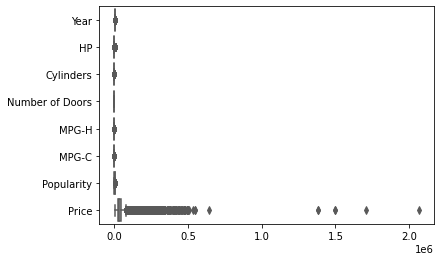

In [25]:
#checking for any outliers in the data
sns.boxplot(data=df,orient='h',palette='Set2')

In [26]:
#removing the unnecessary data points from the dataset
df.drop(df[df['Price'] >= 500000].index,inplace=True)

In [27]:
df

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,204,50920


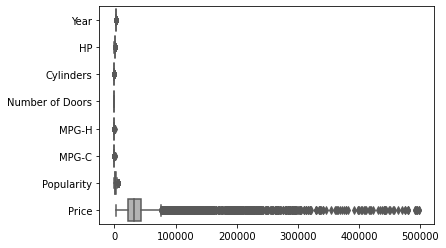

In [28]:
sns.boxplot(data=df,orient='h',palette='Set2')


In [29]:
q1,q3=np.percentile(df['Popularity'],[25,75])
iqr=q3-q1
whisker=q3+(1.5*iqr)
print(whisker)

4199.0


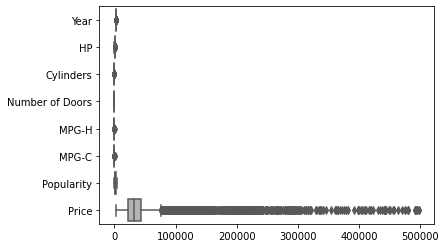

In [30]:
df['Popularity'] = df['Popularity'].clip(upper=whisker)
sns.boxplot(data=df,orient='h',palette='Set2')

# **Finding most represented Brand in the dataset and finding the average price among the top car brands**



In [31]:
#calculating percentage of each brand
counts=df['Make'].value_counts()*100/sum(df['Make'].value_counts())

In [73]:
#plotting the top 10 brands represented in the dataset
popular_labels=counts.index[:10]
colors=['mediumblue',]*len(popular_labels)
colors[0]='coral'
fig=go.Figure(data=[go.Bar(x=counts[:10],y=popular_labels,marker_color=colors,orientation='h')])
fig.update_layout(title_text='Most represented Car Brands in the Dataset',xaxis_title="PERCENTAGE",yaxis_title="CAR BRAND")

**Most represented brand in this dataset is
'Chevrolet'.**

In [33]:
#calculating the average price of top 10 brands represented in the dataset
prices = df[['Make','Price']].loc[(df['Make'].isin(popular_labels))].groupby('Make').mean()
print(prices)

                   Price
Make                    
Cadillac    56505.906329
Chevrolet   29570.165868
Dodge       26609.002155
Ford        29416.142484
GMC         33489.375536
Honda       26586.334940
Mazda       20516.430446
Nissan      29208.473783
Toyota      28531.979502
Volkswagen  30606.526627


# **BOXPLOT**

In [34]:
display_p=df[['Make','Year','Price']].loc[(df['Make'].isin(popular_labels))]
fig=px.box(display_p,x="Make",y="Price")
fig.update_layout(title_text='Average Price over 10 most represented Car Brands',xaxis_title="MAKES",yaxis_title="AVERAGE PRICE")

# **Ploting correlation matrix and Documenting insights**

In [35]:
#finding the correlation between different variables/features
df.corr()

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.329309,-0.024197,0.238313,0.260240,0.214973,0.122020,0.252985
HP,0.329309,1.000000,0.788450,-0.147704,-0.424554,-0.477009,0.059883,0.732654
Cylinders,-0.024197,0.788450,1.000000,-0.157591,-0.608423,-0.631247,0.036819,0.612415
Number of Doors,0.238313,-0.147704,-0.157591,1.000000,0.118882,0.142201,-0.074853,-0.179489
MPG-H,0.260240,-0.424554,-0.608423,0.118882,1.000000,0.838654,0.006444,-0.235188
MPG-C,0.214973,-0.477009,-0.631247,0.142201,0.838654,1.000000,0.018046,-0.265749
Popularity,0.122020,0.059883,0.036819,-0.074853,0.006444,0.018046,1.000000,-0.039650
Price,0.252985,0.732654,0.612415,-0.179489,-0.235188,-0.265749,-0.039650,1.000000


# **HEATMAP**

A heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors. The seaborn python package allows the creation of annotated heatmaps which can be tweaked using Matplotlib tools 

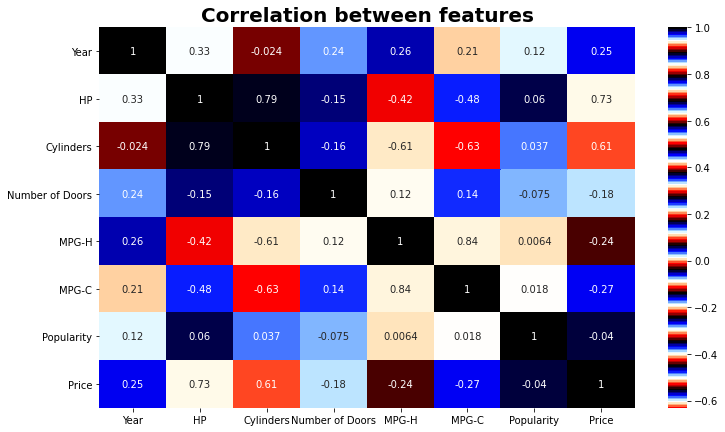

In [36]:
#plotting the heatmap for different features
df_corr=df.corr()
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(df_corr,cmap='flag',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=20)
plt.show()

# **SCATTERPLOT**

Matplot has a built-in function to create scatterplots called scatter(). A scatter plot is a type of plot that shows the data as a collection of points. The position of a point depends on its two-dimensional value, where each value is a position on either the horizontal or vertical dimension.

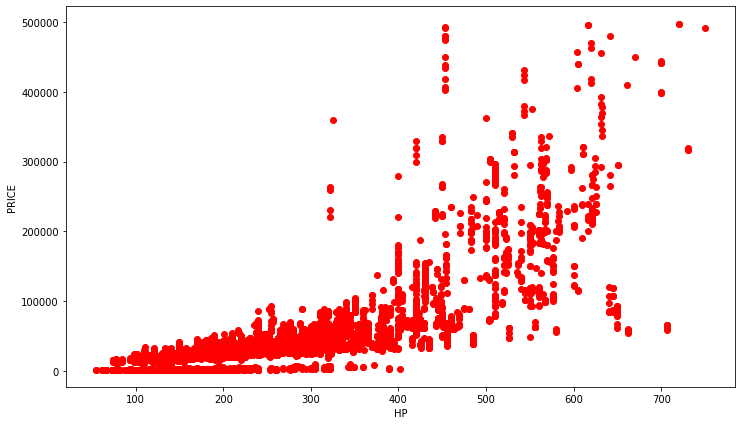

In [37]:
fig,ax = plt.subplots(figsize=(12,7))
ax.scatter(df['HP'],df['Price'],color = 'red')
ax.set_xlabel('HP')
ax.set_ylabel('PRICE')
plt.show()

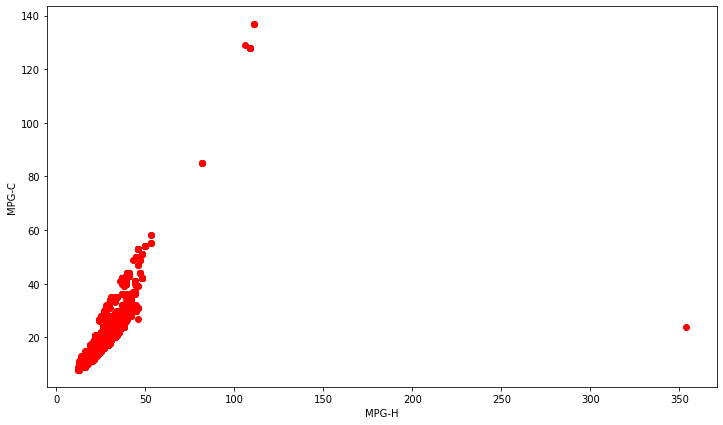

In [38]:
fig,ax = plt.subplots(figsize=(12,7))
ax.scatter(df['MPG-H'],df['MPG-C'],color = 'red')
ax.set_xlabel('MPG-H')
ax.set_ylabel('MPG-C')
plt.show()

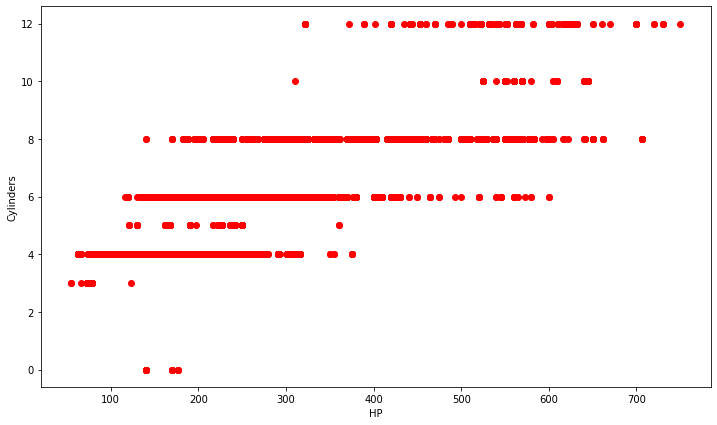

In [39]:
fig,ax = plt.subplots(figsize=(12,7))
ax.scatter(df['HP'],df['Cylinders'],color = 'red')
ax.set_xlabel('HP')
ax.set_ylabel('Cylinders')
plt.show()

# **EDA Visualisation**

In [40]:
#creating new column 'Price Range' for easy visualization
def getrange(Price):
  if (Price>= 0 and Price < 50000):
    return '0 - 50000'
  if (Price >= 50000 and Price < 100000):
      return '50000 - 100000'
  if (Price >= 100000 and Price < 150000):
        return '100000 - 150000'
  if (Price >= 150000 and Price < 200000):
        return '150000 - 200000'
  if (Price >= 200000 and Price < 250000):
        return '200000 - 250000'
  if (Price >= 250000 and Price < 300000):
        return '250000 - 300000'
  if (Price >= 300000 and Price < 350000):
        return '300000 - 350000'
  if (Price >= 350000 and Price < 400000):
         return '350000 - 400000'
  if (Price >=400000 and Price < 450000):
        return '400000 - 450000'
  if (Price >= 450000 and Price < 500000):
        return '450000 - 500000'
                      

df['Price Range'] = df.apply(lambda x:getrange(x['Price']),axis = 1)

df['Price Range'].value_counts()

          
      

0 - 50000          8550
50000 - 100000     1300
100000 - 150000     217
150000 - 200000     128
200000 - 250000     116
250000 - 300000      65
300000 - 350000      34
400000 - 450000      18
450000 - 500000      17
350000 - 400000      15
Name: Price Range, dtype: int64

#**Plotting different graphs**

#**BOXPLOT**

A Box Plot is also known as Whisker plot is created to display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum. In the box plot, a box is created from the first quartile to the third quartile, a verticle line is also there which goes through the box at the median.

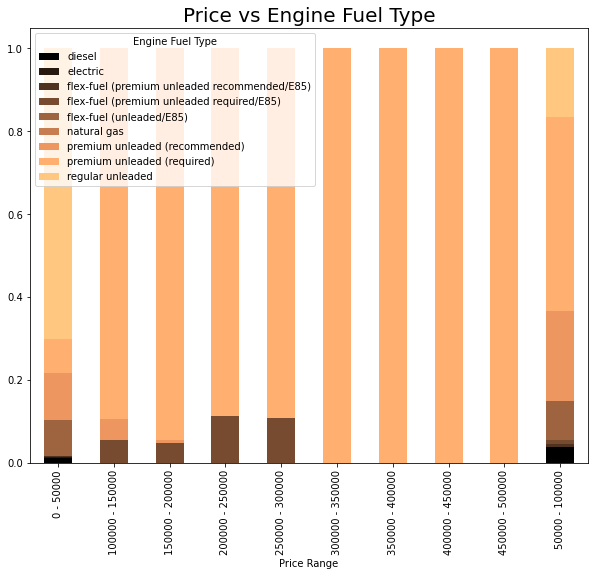

In [41]:
plt.rcParams['figure.figsize'] = (10,8)
x = pd.crosstab(df['Price Range'],df['Engine Fuel Type'])
color = plt.cm.copper(np.linspace(0,1,9))
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True ,color=color)
plt.title("Price vs Engine Fuel Type",fontweight = 30,fontsize = 20)
plt.show()

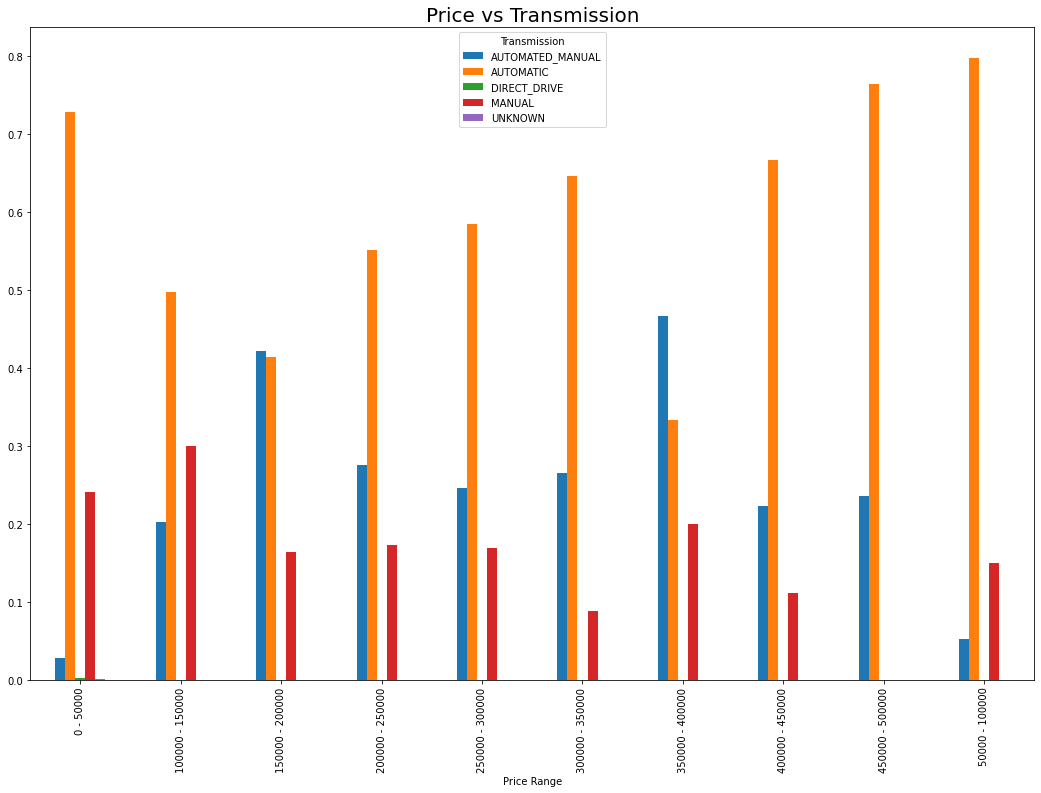

In [42]:
plt.rcParams['figure.figsize'] = (18,12)
x = pd.crosstab(df['Price Range'],df['Transmission'])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = False)
plt.title('Price vs Transmission',fontweight = 30,fontsize = 20)
plt.show()

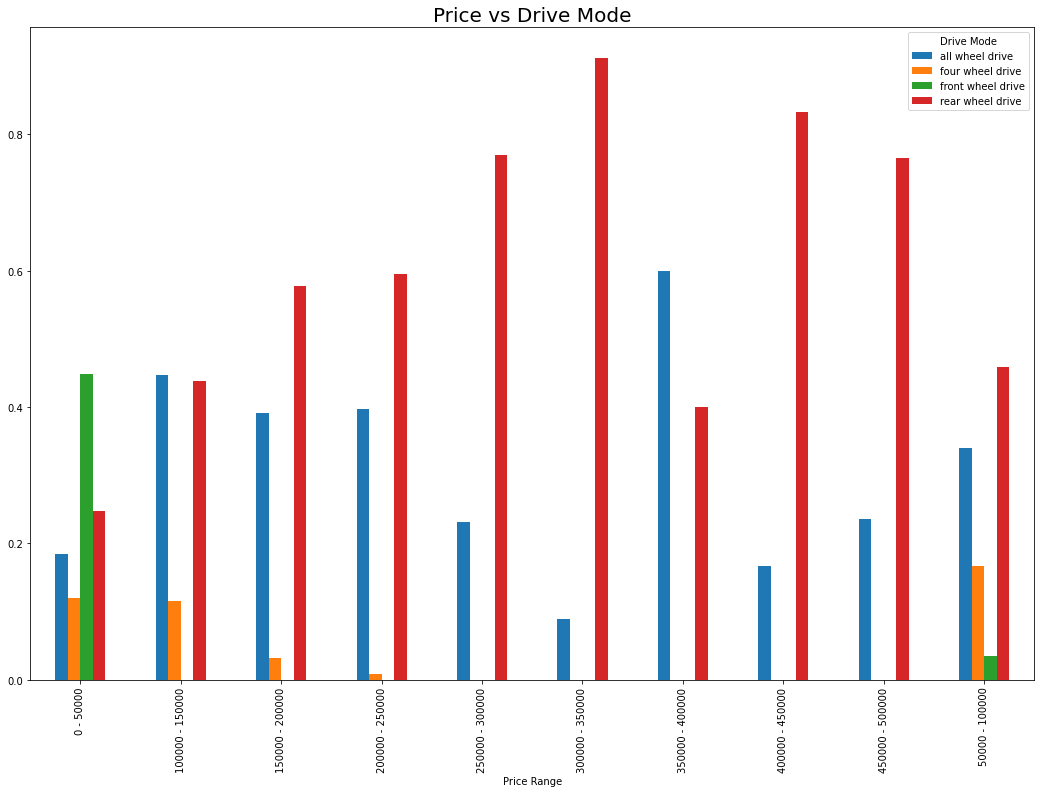

In [43]:
plt.rcParams['figure.figsize'] = (18,12)
x = pd.crosstab(df['Price Range'],df['Drive Mode'])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = False)
plt.title('Price vs Drive Mode',fontweight = 30,fontsize = 20)
plt.show()

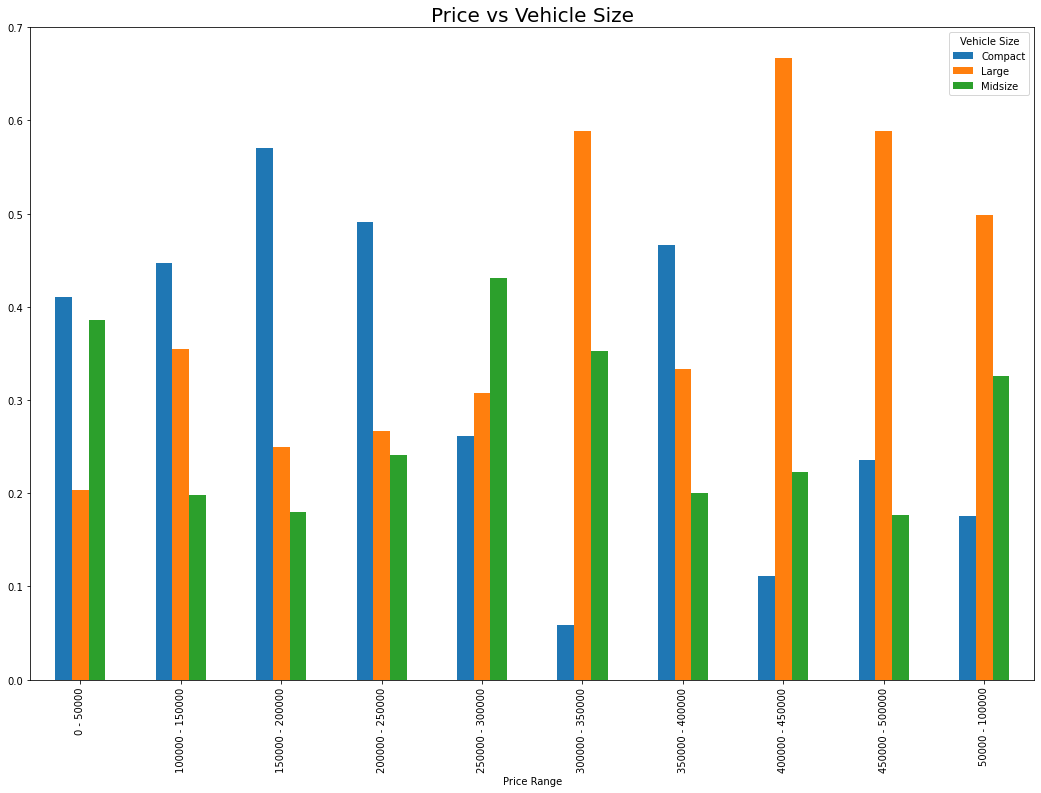

In [44]:
plt.rcParams['figure.figsize'] = (18,12)
x = pd.crosstab(df['Price Range'],df['Vehicle Size'])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = False)
plt.title('Price vs Vehicle Size',fontweight = 30,fontsize = 20)
plt.show()

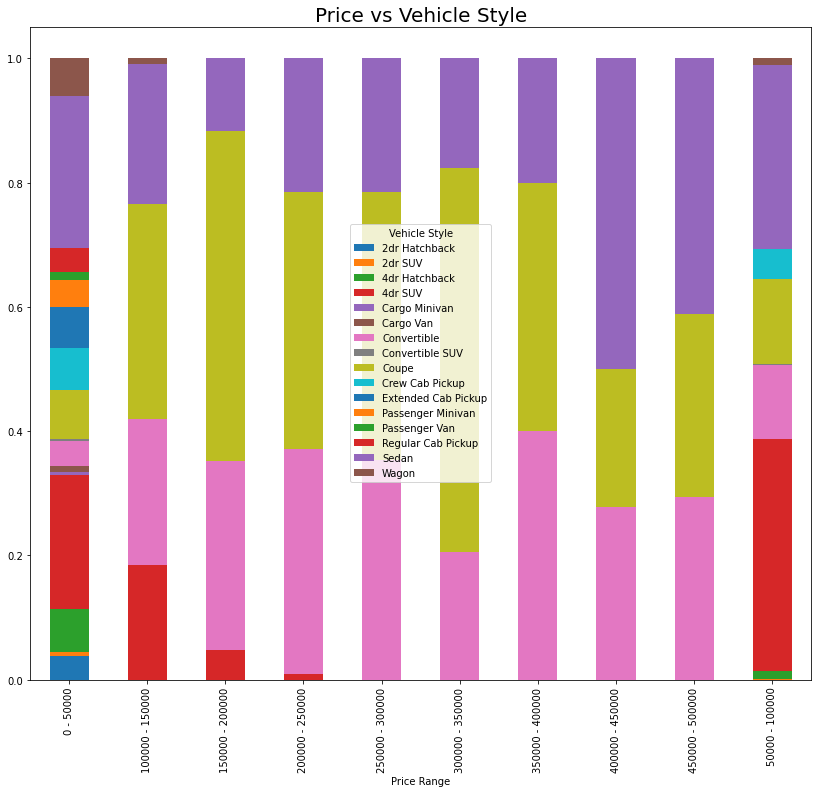

In [45]:
plt.rcParams['figure.figsize'] = (14,12)
x = pd.crosstab(df['Price Range'],df['Vehicle Style'])
x.div(x.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True)
plt.title("Price vs Vehicle Style",fontweight = 30,fontsize = 20)
plt.show()

In [46]:
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price,Price Range
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,0 - 50000
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,0 - 50000
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,0 - 50000
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,0 - 50000
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,0 - 50000


In [47]:
df.shape

(10460, 16)

# **Splitting the dataset into 80 and 20 ratio and building a machine learning model with Price as the target variable**


In [48]:
# performing label encoding to the categorical columns
columns_to_convert=['Make','Model','Engine Fuel Type','Transmission','Drive Mode','Vehicle Size','Vehicle Style','Price Range']
df[columns_to_convert] = df[columns_to_convert].astype('category')

In [49]:
df.dtypes

Make                category
Model               category
Year                   int64
Engine Fuel Type    category
HP                   float64
Cylinders            float64
Transmission        category
Drive Mode          category
Number of Doors      float64
Vehicle Size        category
Vehicle Style       category
MPG-H                  int64
MPG-C                  int64
Popularity             int64
Price                  int64
Price Range         category
dtype: object

In [50]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
for col in ['Make','Model','Engine Fuel Type','Transmission','Drive Mode','Vehicle Size','Vehicle Style','Price Range']: df[col] = label_encoder.fit_transform(df[col])

In [51]:
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price,Price Range
0,4,1,2011,7,335.0,6.0,3,3,2.0,0,8,26,19,3916,46135,0
1,4,0,2011,7,300.0,6.0,3,3,2.0,0,6,28,19,3916,40650,0
2,4,0,2011,7,300.0,6.0,3,3,2.0,0,8,28,20,3916,36350,0
3,4,0,2011,7,230.0,6.0,3,3,2.0,0,8,28,18,3916,29450,0
4,4,0,2011,7,230.0,6.0,3,3,2.0,0,6,28,18,3916,34500,0


In [52]:
# splitting the dependent and independent variables
x = df[['Popularity','Year','HP','Cylinders','MPG-H','MPG-C']].values
y = df['Price'].values
print(x.shape)
print(y.shape)

(10460, 6)
(10460,)


In [53]:
#normalizing the data
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y.reshape(-1,1))

#**Splitting The Dataset**

In [54]:
# splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8368, 6)
(8368, 1)
(2092, 6)
(2092, 1)


#**Checking the performance over metrics like Rsquare, RMSE, MAE,MSE**

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**MSE (Mean Squared Error)** represents the difference between the original and predicted values extracted by squared the average difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

#**Linear Regression**

linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression.

In [55]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
# calculating the accuracies
print("Training Accuracy :",lr_model.score(x_train,y_train))
print("Testing Accuracy :",lr_model.score(x_test,y_test))

Training Accuracy : 0.5710139076443146
Testing Accuracy : 0.5592618594638239


In [56]:
y_pred = lr_model.predict(x_test)
y_pred[0:5]

array([[1.13225213],
       [0.19310765],
       [0.44988304],
       [0.5120838 ],
       [2.77334446]])

Text(0, 0.5, 'Predicted Values')

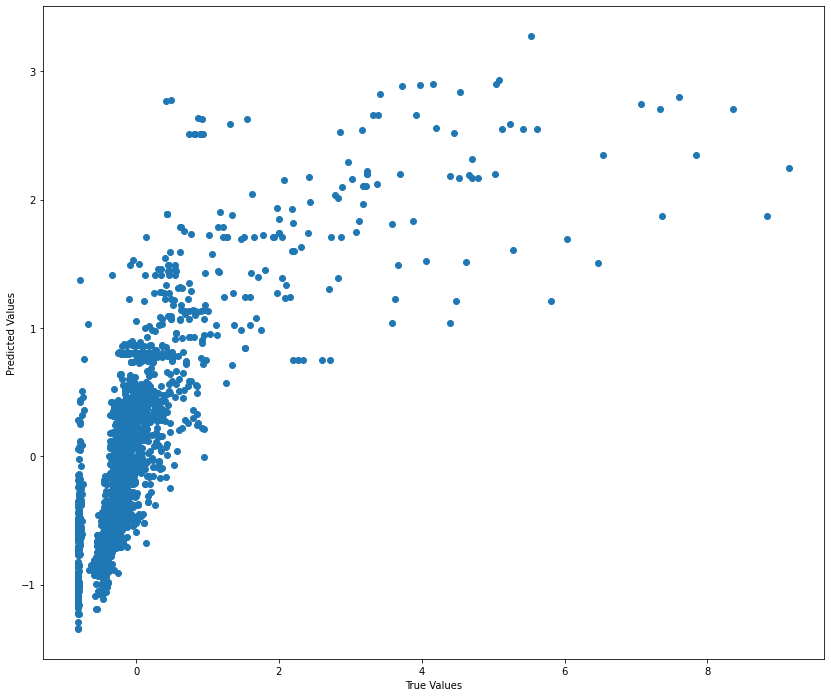

In [57]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

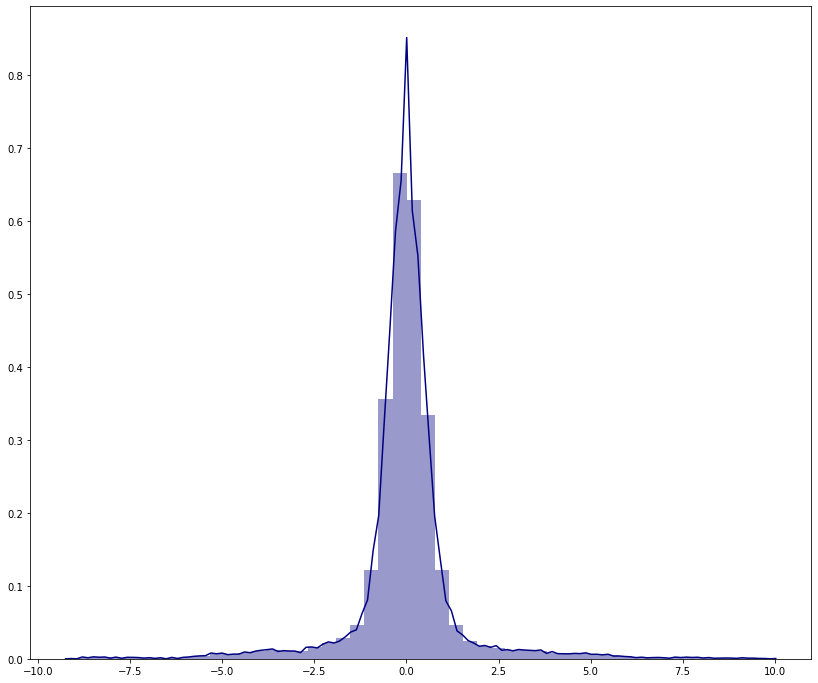

In [80]:
sns.distplot((y_test-y_pred),bins=50,color = 'navy')

In [59]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import math
print("R2_Score : ", r2_score(y_test,y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RSME : ",math.sqrt(mean_squared_error(y_test,y_pred)))

R2_Score :  0.5592618594638239
Mean Squared Error :  0.4390296712961832
MAE :  0.3943862782598961
RSME :  0.662593141600623


In [60]:
results_df = pd.DataFrame(data=[["Linear Regression", lr_model.score(x_train,y_train),lr_model.score(x_test,y_test),r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),math.sqrt(mean_squared_error(y_test,y_pred))]],columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','r2 score','MSE','MAE','RMSE'])
results_df

,Model,Training Accuracy %,Testing Accuracy %,r2 score,MSE,MAE,RMSE
0,Linear Regression,0.571014,0.559262,0.559262,0.43903,0.394386,0.662593


#**SVM**

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems.

In [61]:
from sklearn.svm import SVR
svr_model=SVR(kernel = 'rbf')
svr_model.fit(x_train,y_train)
# calculating the accuracies
print("Training Accuracy :",svr_model.score(x_train,y_train))
print("Testing Accuracy :",svr_model.score(x_test,y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Training Accuracy : 0.8507118572525758
Testing Accuracy : 0.8521817203024844


In [62]:
y_pred = svr_model.predict(x_test)
y_pred[0:5]

array([ 0.38599701, -0.08809701, -0.13775308,  0.18142157,  0.32801158])

Text(0, 0.5, 'Predicted Values')

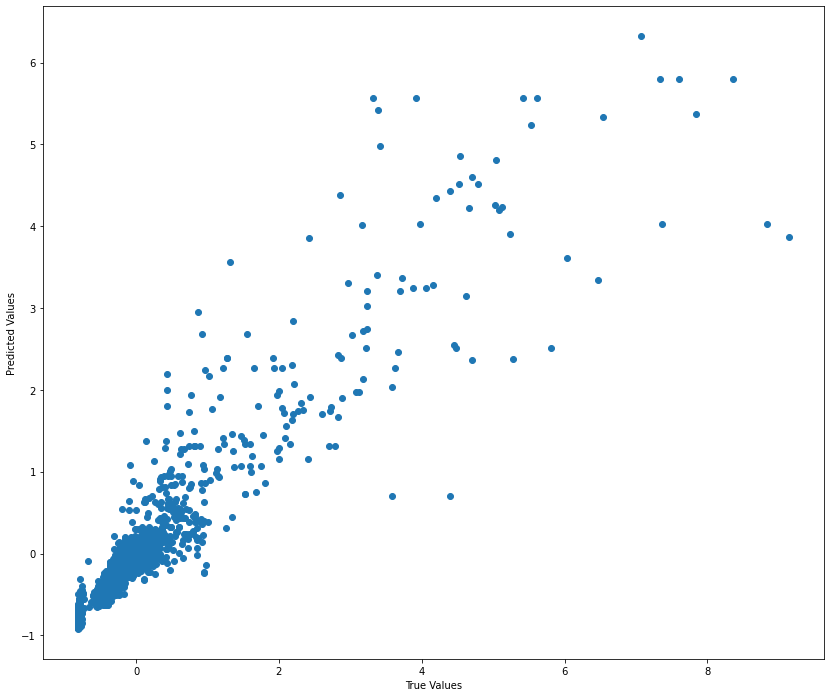

In [63]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

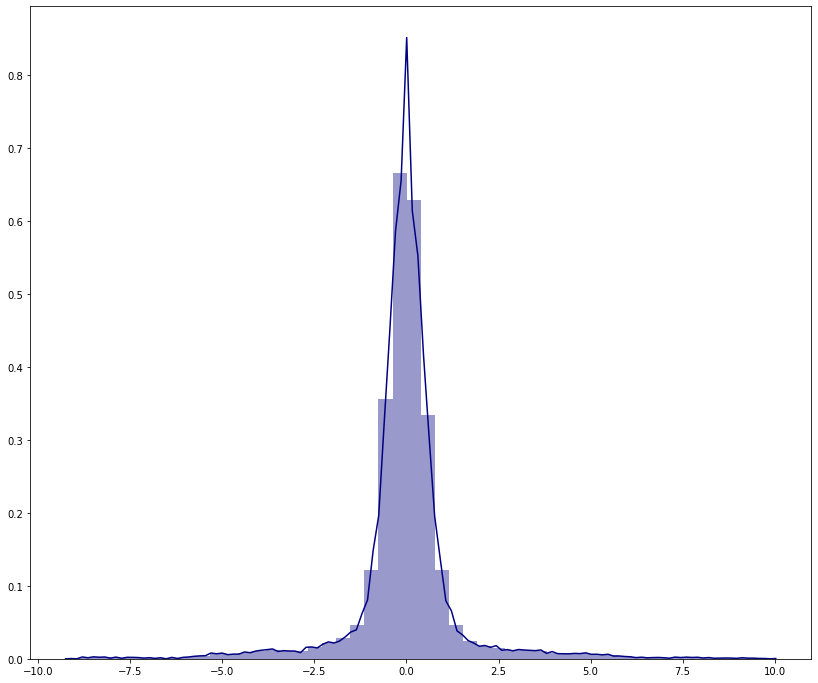

In [79]:
sns.distplot((y_test-y_pred),bins=50,color = 'navy')

In [65]:
print("R2_Score : ", r2_score(y_test,y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RSME : ",math.sqrt(mean_squared_error(y_test,y_pred)))

R2_Score :  0.8521817203024844
Mean Squared Error :  0.14724527963070808
MAE :  0.17057057318819852
RSME :  0.3837255264257358


In [66]:
results_df_2 = pd.DataFrame(data=[["Support Vector Machine", svr_model.score(x_train,y_train),svr_model.score(x_test,y_test),r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),math.sqrt(mean_squared_error(y_test,y_pred))]],
columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','r2 score','MSE','MAE','RMSE'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,r2 score,MSE,MAE,RMSE
0,Linear Regression,0.571014,0.559262,0.559262,0.439030,0.394386,0.662593
1,Support Vector Machine,0.850712,0.852182,0.852182,0.147245,0.170571,0.383726


#**Random Forest Regression**

A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging. The basic idea behind this is to combine multiple decision trees in determining the final output rather than relying on individual decision trees.
Random Forest has multiple decision trees as base learning models. 

In [67]:
from sklearn.ensemble import RandomForestRegressor
rfc_model=RandomForestRegressor(n_estimators=300,random_state=0)
rfc_model.fit(x_train,y_train)
# calculating the accuracies
print("Training Accuracy :",rfc_model.score(x_train,y_train))
print("Testing Accuracy :",rfc_model.score(x_test,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Training Accuracy : 0.9902209276726348
Testing Accuracy : 0.9630203829050827


In [68]:
y_pred = rfc_model.predict(x_test)
y_pred[0:5]

array([ 0.84852718, -0.15766547,  0.13368894,  0.177454  ,  0.49045655])

Text(0, 0.5, 'Predicted Values')

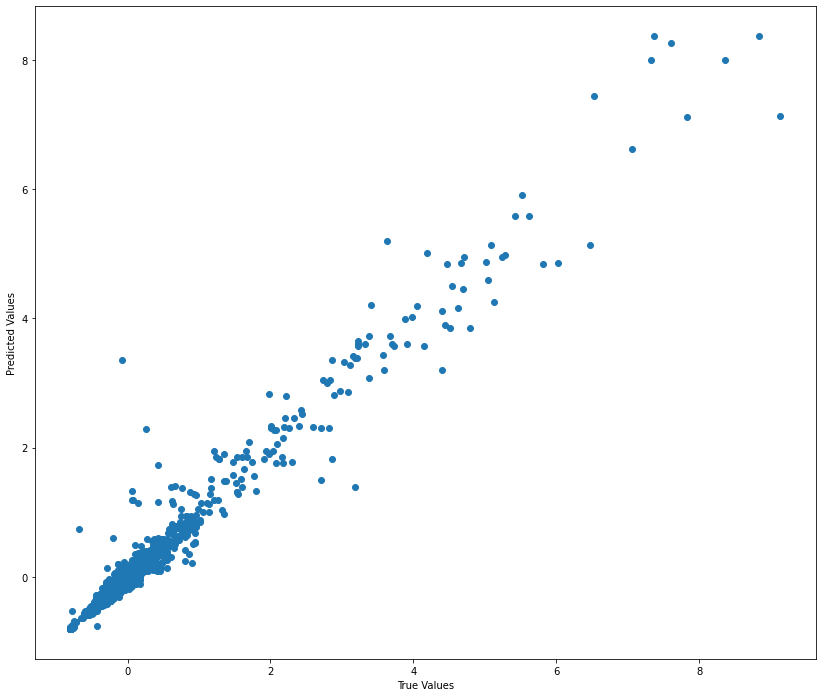

In [69]:
plt.scatter(y_test,y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

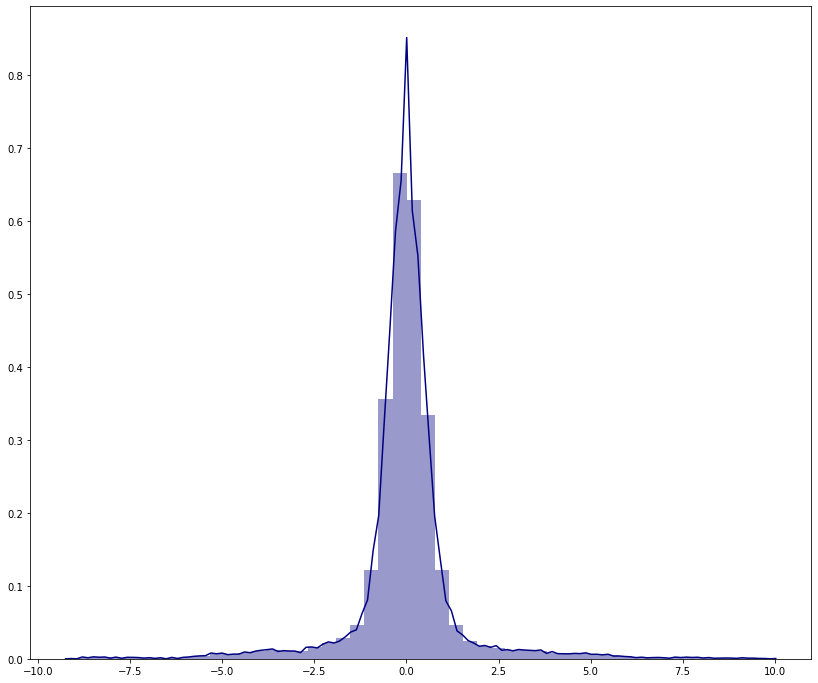

In [78]:
sns.distplot((y_test-y_pred),bins=50,color = 'navy')

In [71]:
print("R2_Score : ", r2_score(y_test,y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))
print("MAE : ",mean_absolute_error(y_test,y_pred))
print("RSME : ",math.sqrt(mean_squared_error(y_test,y_pred)))

R2_Score :  0.9630203829050827
Mean Squared Error :  0.03683626998582308
MAE :  0.08513314918200646
RSME :  0.1919277728360934


In [72]:
results_df_2 = pd.DataFrame(data=[["Random Forest Regression", rfc_model.score(x_train,y_train),rfc_model.score(x_test,y_test),r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred),math.sqrt(mean_squared_error(y_test,y_pred))]],
columns=['Model', 'Training Accuracy %', 'Testing Accuracy %','r2 score','MSE','MAE','RMSE'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %,r2 score,MSE,MAE,RMSE
0,Linear Regression,0.571014,0.559262,0.559262,0.439030,0.394386,0.662593
1,Support Vector Machine,0.850712,0.852182,0.852182,0.147245,0.170571,0.383726
2,Random Forest Regression,0.990221,0.963020,0.963020,0.036836,0.085133,0.191928


**Random Forest Regression has the best accuracy of 96% among all the algorithms**